In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('DataSet/so2.csv', parse_dates=['Date Local'])
date = dataset["Date Local"]
means = dataset.iloc[:, 2].values
print(means)

[ 3.        3.        2.975     2.975     1.958333  1.958333  1.9375
  1.9375    5.25      5.25      5.2       5.2       7.083333  7.083333
  7.05      7.05      8.708333  8.708333  8.7       8.7       6.761905
  6.761905  7.066667  7.066667  8.666667  8.666667  8.6375    8.6375
  8.25      8.25      8.2125    8.2125    6.5       6.5       6.475
  6.475     9.958333  9.958333  9.925     9.925    11.625    11.625
 11.6      11.6      10.916667 10.916667 10.875    10.875    10.952381
 10.952381 11.766667 11.766667 11.625    11.625    11.5875   11.5875
  9.583333  9.583333  9.55      9.55      6.458333  6.458333  6.4375
  6.4375    8.5       8.5       8.45      8.45     12.166667 12.166667
 12.125    12.125    10.166667 10.166667 10.1375   10.1375    9.391304
  9.391304  9.5       9.5       7.958333  7.958333  7.9       7.9
  6.875     6.875     6.85      6.85      6.791667  6.791667  6.7625
  6.7625    9.083333  9.083333  9.05      9.05      7.833333  7.833333
  7.8       7.8       3.363

In [3]:
def wrangle(df):
    
    df["Date Local"]=pd.to_datetime(df["Date Local"])
    df["Month"]=df["Date Local"].dt.month
    df["Year"]=df["Date Local"].dt.year
    df=df.drop("Date Local",axis=1)
    df=df.drop("Month",axis=1)
    df=df[df.Year>=1850]
    df=df.set_index(['Year'])
    #date=df.iloc[:,:0]
    
    
    df=df.dropna()
    
    return df

In [4]:
dataset = wrangle(dataset)

In [5]:
dataset

SO2 Units  SO2 Mean
Year                             
1917  Parts per billion  3.000000
1918  Parts per billion  3.000000
1919  Parts per billion  2.975000
1920  Parts per billion  2.975000
1921  Parts per billion  1.958333
...                 ...       ...
2013  Parts per billion  7.833333
2014  Parts per billion  7.833333
2015  Parts per billion  7.800000
2016  Parts per billion  7.800000
2017  Parts per billion  3.363636

[101 rows x 2 columns]

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 1917 to 2017
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SO2 Units  101 non-null    object 
 1   SO2 Mean   101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [7]:
dataset = dataset.drop(columns=['SO2 Units'],axis=1)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 1917 to 2017
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SO2 Mean  101 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [9]:
year_temp=[]
for i in range(len(date)):
    year_temp.append(date[i].year) 
year_temp = np.array(year_temp)
year_temp = year_temp.reshape(-1, 1)


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(year_temp,means,test_size=0.1,random_state=10)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
year_temp_poly = poly_reg.fit_transform(year_temp)
poly_reg.fit(year_temp_poly, means)

PolynomialFeatures(degree=3)

In [12]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(year_temp_poly, means)

LinearRegression()

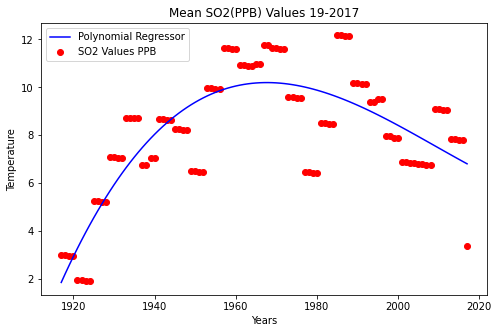

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(year_temp, means, color = 'red',label="SO2 Values PPB")
plt.plot(year_temp, lin_reg_2.predict(poly_reg.fit_transform(year_temp)), color = 'blue',label="Polynomial Regressor")
plt.title("Mean SO2(PPB) Values 19-2017")
plt.xlabel("Years")
plt.ylabel("Temperature")
plt.legend(loc="upper left")
plt.show()

In [14]:
z = lin_reg_2.predict(poly_reg.fit_transform(year_temp))

from sklearn.metrics import mean_squared_error
print("The Mean Squared Error is ",round(mean_squared_error(means, z),4))

#Mean Square Error

The Mean Squared Error is  2.2588


In [15]:
print(lin_reg_2.predict(poly_reg.fit_transform([[2050]])))
#print(dataset_2.loc[len(dataset_2)-1,"ANNUAL"])

[4.91328964]
